## Analysis of DMS53 variants generated by Clayton Wandishin
Dropkick-filtered data from `AW_DMS53_processing.ipynb`.

In [1]:
import os
import sys
import scanpy as sc
import scvelo as scv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.9.1 pandas==1.3.5 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [4]:
dms53_dk = sc.read_h5ad('/Users/darren/temp/CW_DMS53variants_dk_data.h5ad')
dms53_dk

AnnData object with n_obs × n_vars = 6356 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'mito', 'pct_dropout_by_counts-S1 DMS53_KOR', 'ambient-S1 DMS53_KOR', 'dropkick_coef-S1 DMS53_KOR', 'pct_dropout_by_counts-S2 DMS53_RESTko', 'ambient-S2 DMS53_RESTko', 'dropkick_coef-S2 DMS53_RESTko', 'pct_dropout_by_counts-S3 DMS53_Hes1ko', 'ambient-S3 DMS53_Hes1ko', 'dropkick_coef-S3 DMS53_Hes1ko', 'pct_dropout_by_counts-S4 DMS53_NR0B1ko', 'ambient-S4 DMS53_NR0B1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'pct_dropout_by_counts-S5 DMS53_ELF3ko', 'ambient-S5 DMS53_ELF3ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'pct_dropout_by_counts', 'ambient', 'n_c

In [5]:
dms53_dk.obs.head(30)

dropkick_score dropkick_label  \
AAATGACCCGTTCTGTT-S1 DMS53_KOR          0.669535           True   
AAGCGCCTTCGCTCTCA-S1 DMS53_KOR          0.774037           True   
GACCACATTACGGCTTAC-S1 DMS53_KOR         0.647996           True   
TGATGTGGCTATCGACACC-S1 DMS53_KOR        0.501247           True   
ATCTGCATCACACTAAG-S1 DMS53_KOR          0.575408           True   
TGACACAGTTTGATTAGAC-S1 DMS53_KOR        0.780057           True   
GACGCTAGTCCATCTCCC-S1 DMS53_KOR         0.938239           True   
GAGAGAGTATGAAGTGCC-S1 DMS53_KOR         0.608053           True   
TGAGATTTACCAATGTTTG-S1 DMS53_KOR        0.516951           True   
TGAAGCGCGATGAGGCTGA-S1 DMS53_KOR        0.547783           True   
TGAAGGTTGTGCGACGTCA-S1 DMS53_KOR        0.626168           True   
GCTCTAGTCTTGGTGT-S1 DMS53_KOR           0.683846           True   
GAGTTTCGTTCGGCCT-S1 DMS53_KOR           0.552463           True   
ACCTTGCCCTCCGCAT-S1 DMS53_KOR           0.511639           True   
AAAGGTAATCAGACCAT-S1 DMS53_KOR          0.611356           True   
GAGAGAATTGGGAATAGA-S1 DMS53_KOR         0.755919           True   
AGCAAAGCCACGCTCAG-S1 DMS53_KOR          0.510995           True   
TGACACAAGGCTCTCAACC-S1 DMS53_KOR        0.508061           True   
CTTTAATCCATACATT-S1 DMS53_KOR           0.519795           True   
ATATGCATATTCCTTG-S1 DMS53_KOR           0.597520           True   
CGCTAATAAGTTTAGA-S1 DMS53_KOR           0.630369           True   
TGACACAGTTTAAACCTCC-S1 DMS53_KOR        0.683487           True   
ACCGCAACTAAGATTGT-S1 DMS53_KOR          0.707867           True   
CTATAGAGCTTGGTGT-S1 DMS53_KOR           0.661497           True   
AAGAACGGGATGGGCAC-S1 DMS53_KOR          0.673505           True   
TTTGTGTCCACAGTTT-S1 DMS53_KOR           0.500390           True   
TGATGTGGCTAAGAAGTCC-S1 DMS53_KOR        0.726318           True   
GACTTCTTCGACGCAGAG-S1 DMS53_KOR         0.658197           True   
TGAGACAACTTATGACTTT-S1 DMS53_KOR        0.519166           True   
GAGACAGATACATACATT-S1 DMS53_KOR         0.682509           True   

                                  arcsinh_n_genes_by_counts AW_DMS53_sample  \
AAATGACCCGTTCTGTT-S1 DMS53_KOR                     6.100324    S1 DMS53_KOR   
AAGCGCCTTCGCTCTCA-S1 DMS53_KOR                     6.104798    S1 DMS53_KOR   
GACCACATTACGGCTTAC-S1 DMS53_KOR                    6.109253    S1 DMS53_KOR   
TGATGTGGCTATCGACACC-S1 DMS53_KOR                   6.113687    S1 DMS53_KOR   
ATCTGCATCACACTAAG-S1 DMS53_KOR                     6.118102    S1 DMS53_KOR   
TGACACAGTTTGATTAGAC-S1 DMS53_KOR                   6.122498    S1 DMS53_KOR   
GACGCTAGTCCATCTCCC-S1 DMS53_KOR                    6.126874    S1 DMS53_KOR   
GAGAGAGTATGAAGTGCC-S1 DMS53_KOR                    6.131231    S1 DMS53_KOR   
TGAGATTTACCAATGTTTG-S1 DMS53_KOR                   6.135570    S1 DMS53_KOR   
TGAAGCGCGATGAGGCTGA-S1 DMS53_KOR                   6.135570    S1 DMS53_KOR   
TGAAGGTTGTGCGACGTCA-S1 DMS53_KOR                   6.135570    S1 DMS53_KOR   
GCTCTAGTCTTGGTGT-S1 DMS53_KOR                      6.139889    S1 DMS53_KOR   
GAGTTTCGTTCGGCCT-S1 DMS53_KOR                      6.139889    S1 DMS53_KOR   
ACCTTGCCCTCCGCAT-S1 DMS53_KOR                      6.152737    S1 DMS53_KOR   
AAAGGTAATCAGACCAT-S1 DMS53_KOR                     6.148473    S1 DMS53_KOR   
GAGAGAATTGGGAATAGA-S1 DMS53_KOR                    6.156983    S1 DMS53_KOR   
AGCAAAGCCACGCTCAG-S1 DMS53_KOR                     6.161212    S1 DMS53_KOR   
TGACACAAGGCTCTCAACC-S1 DMS53_KOR                   6.161212    S1 DMS53_KOR   
CTTTAATCCATACATT-S1 DMS53_KOR                      6.161212    S1 DMS53_KOR   
ATATGCATATTCCTTG-S1 DMS53_KOR                      6.169615    S1 DMS53_KOR   
CGCTAATAAGTTTAGA-S1 DMS53_KOR                      6.173790    S1 DMS53_KOR   
TGACACAGTTTAAACCTCC-S1 DMS53_KOR                   6.173790    S1 DMS53_KOR   
ACCGCAACTAAGATTGT-S1 DMS53_KOR                     6.173790    S1 DMS53_KOR   
CTATAGAGCTTGGTGT-S1 DMS53_KOR                      6.177948 

In [6]:
dms53_dk.var.head(30)

mito  pct_dropout_by_counts-S1 DMS53_KOR  ambient-S1 DMS53_KOR  \
LINC00486     False                            5.997465                  True   
MT-ND4         True                           12.105847                  True   
RP5-857K21.4  False                           18.348915                  True   
MT-ND1         True                           16.542545                  True   
MT-CO1         True                           17.627951                  True   
MT-CO3         True                           21.319918                 False   
MT-CYB         True                           18.222152                  True   
CALCA         False                           12.874346                  True   
MT-ATP6        True                           26.739027                 False   
CGA           False                           15.480906                  True   
MT-ND2         True                           29.266360                 False   
MT-RNR2        True                           32.364126                 False   
MT-CO2         True                           33.251466                 False   
SEC11C        False                           15.140231                  True   
MT-ND3         True                           33.615909                 False   
STEAP1B       False                           31.262874                 False   
EEF1A1        False                           32.039296                 False   
RPL31         False                           26.350816                 False   
RPS3          False                           34.408176                 False   
RPS27A        False                           31.159880                 False   
UCHL1         False                           33.338615                 False   
RPS2          False                           39.035018                 False   
RPS16         False                           38.060529                 False   
RPL7          False                           36.127397                 False   
RPLP0         False                           42.315006                 False   
RPL11         False                           36.777056                 False   
RPL7A         False                           37.648550                 False   
ASCL1         False                           36.935509                 False   
BCOR          False                           17.818095                  True   
RPL8          False                           44.469973                 False   

              dropkick_coef-S1 DMS53_KOR  \
LINC00486                            NaN   
MT-ND4                          0.275349   
RP5-857K21.4                         NaN   
MT-ND1                               NaN   
MT-CO1                               NaN   
MT-CO3                               NaN   
MT-CYB                               NaN   
CALCA                                NaN   
MT-ATP6                              NaN   
CGA                                  NaN   
MT-ND2                          0.266207   
MT-RNR2                              NaN   
MT-CO2                          0.674298   
SEC11C                               NaN   
MT-ND3                          0.188037   
STEAP1B                              NaN   
EEF1A1                               NaN   
RPL31                           0.217358   
RPS3                                 NaN   
RPS27A                          0.027230   
UCHL1                                NaN   
RPS2                                 NaN   
RPS16                                NaN   
RPL7                            0.000000   
RPLP0                                NaN   
RPL11                           0.150050   
RPL7A                                NaN   
ASCL1                                NaN   
BCOR                                 NaN   
RPL8                                 NaN   

              pct_dropout_by_counts-S2 DMS53_RESTko  ambient-S2 DMS53_RESTko  \
LINC00486                                  5.036458       

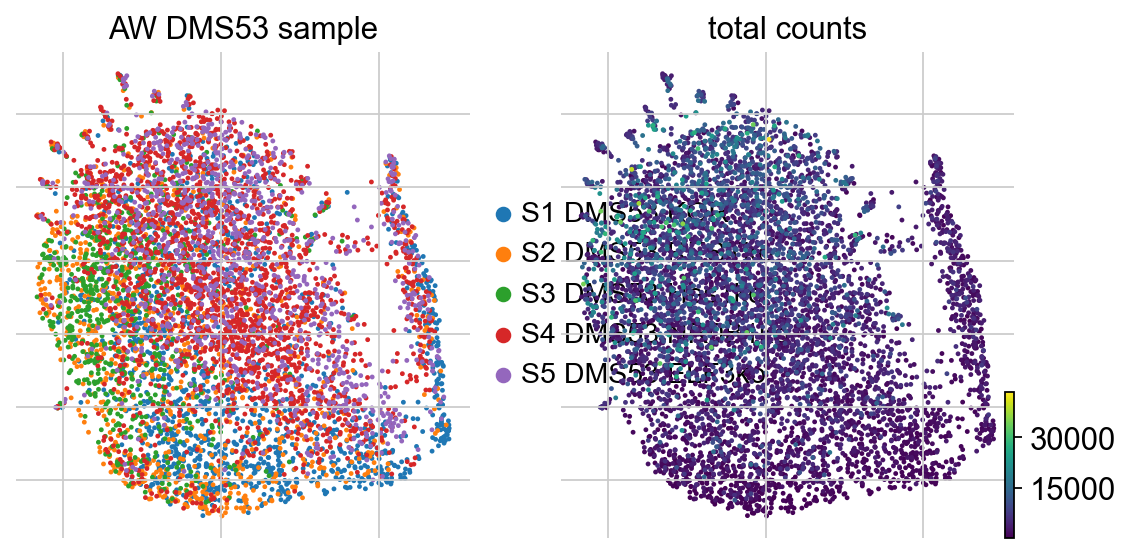

In [7]:
scv.pl.umap(dms53_dk, color = ['AW_DMS53_sample','total_counts'], legend_loc = 'on right')

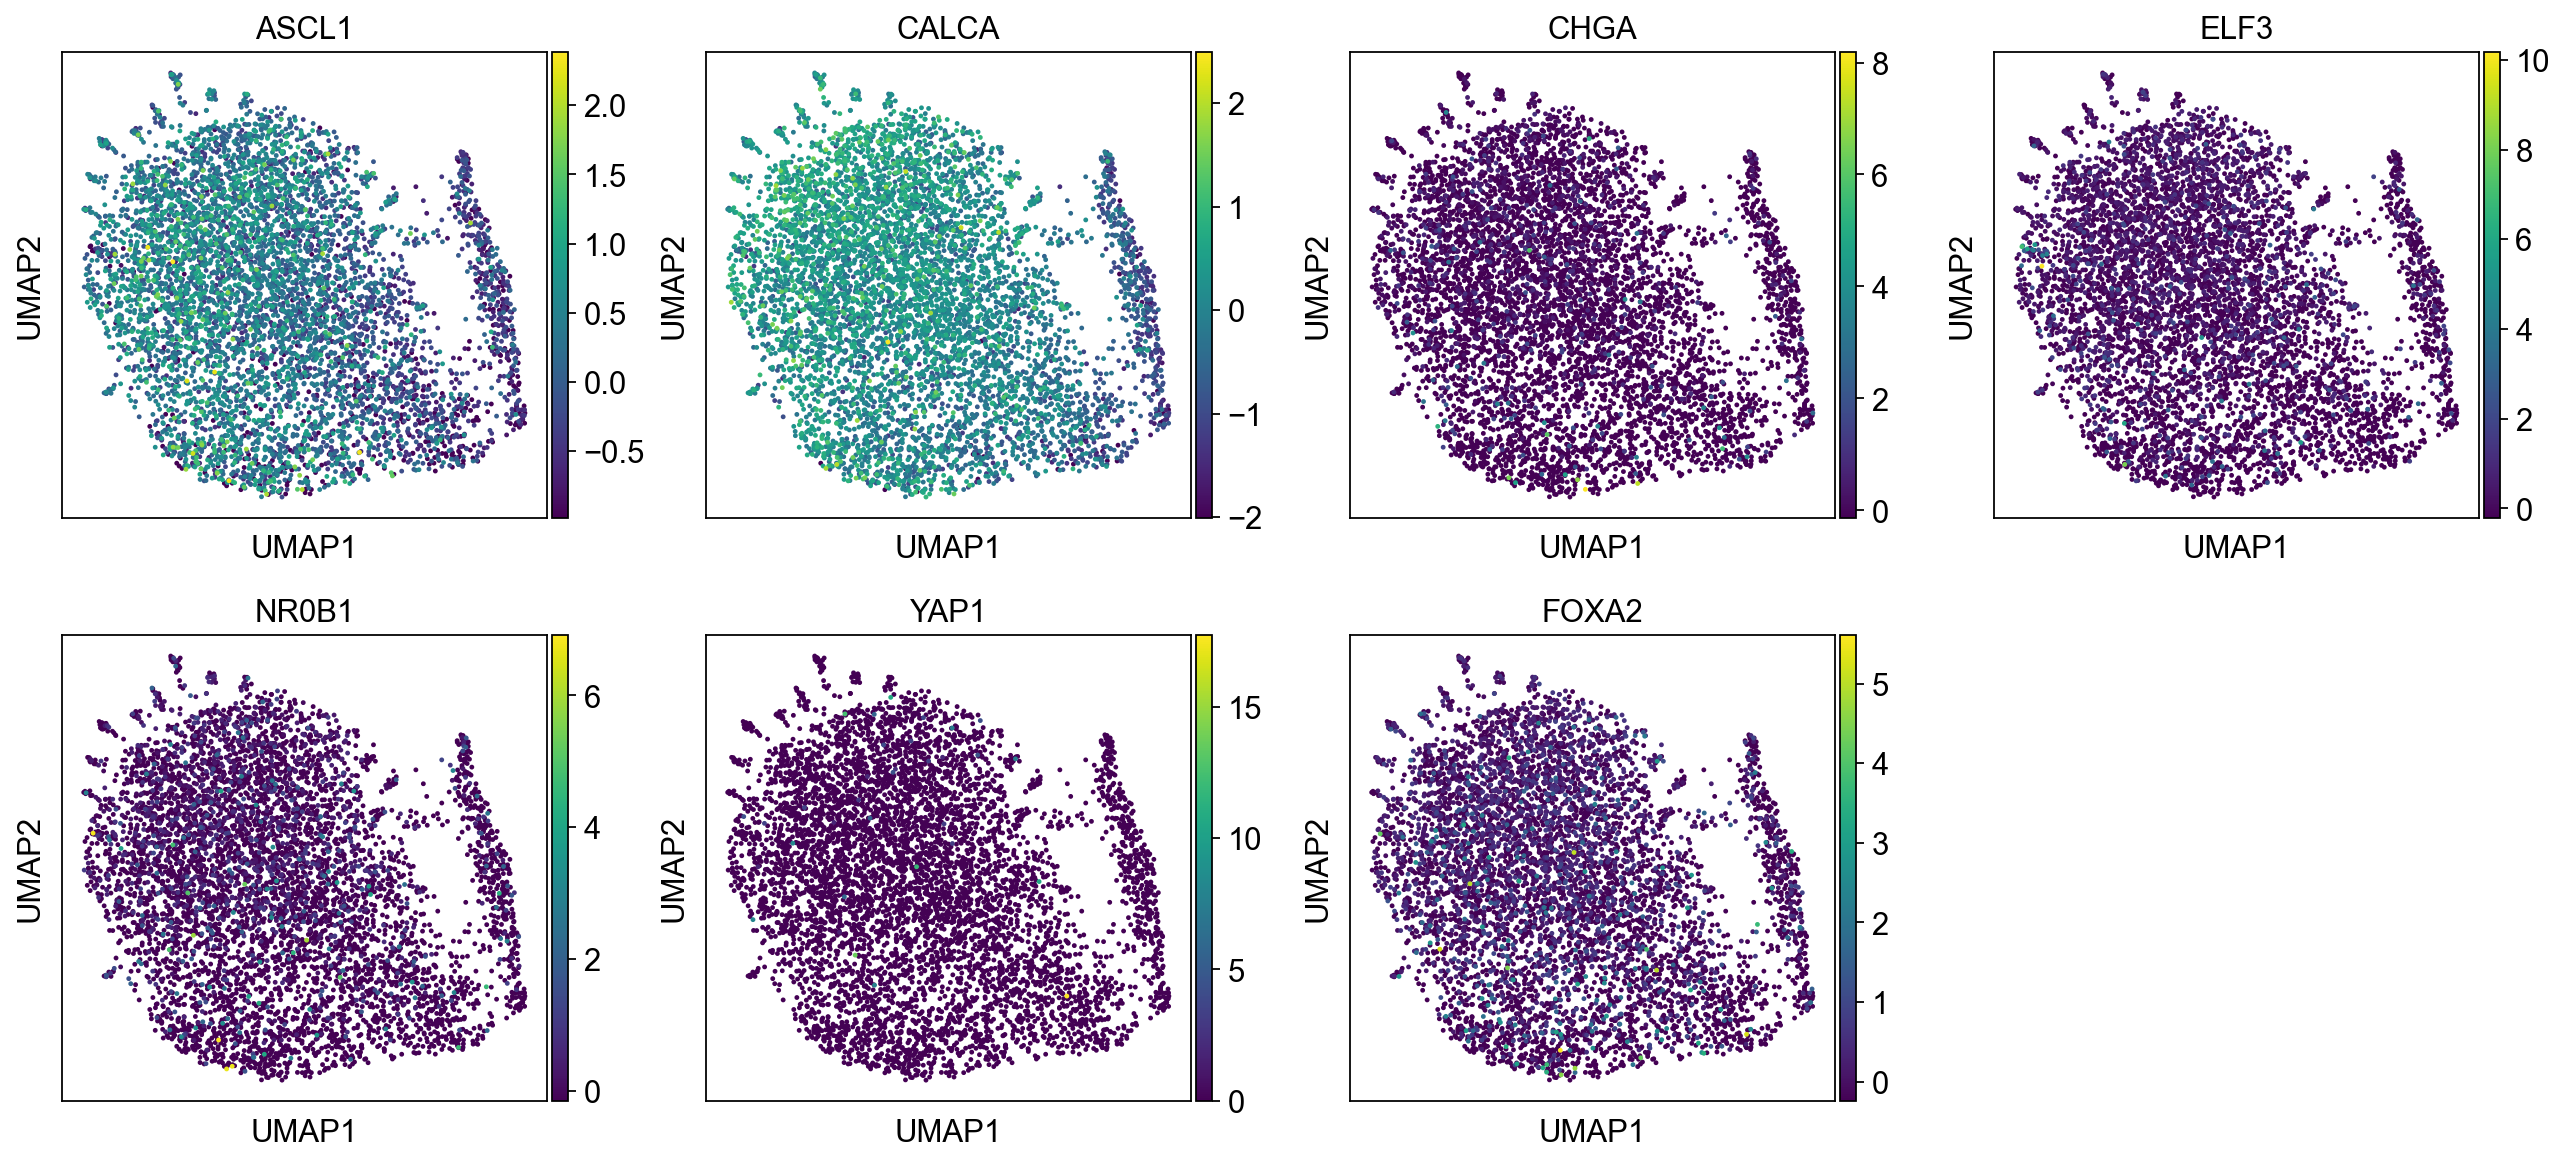

In [8]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(dms53_dk, color=['ASCL1','CALCA','CHGA','ELF3','NR0B1','YAP1','FOXA2'])

In [9]:
dms53_dk

AnnData object with n_obs × n_vars = 6356 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'mito', 'pct_dropout_by_counts-S1 DMS53_KOR', 'ambient-S1 DMS53_KOR', 'dropkick_coef-S1 DMS53_KOR', 'pct_dropout_by_counts-S2 DMS53_RESTko', 'ambient-S2 DMS53_RESTko', 'dropkick_coef-S2 DMS53_RESTko', 'pct_dropout_by_counts-S3 DMS53_Hes1ko', 'ambient-S3 DMS53_Hes1ko', 'dropkick_coef-S3 DMS53_Hes1ko', 'pct_dropout_by_counts-S4 DMS53_NR0B1ko', 'ambient-S4 DMS53_NR0B1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'pct_dropout_by_counts-S5 DMS53_ELF3ko', 'ambient-S5 DMS53_ELF3ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'pct_dropout_by_counts', 'ambient', 'n_c

In [10]:
dms53_dk.obs['AW_DMS53_sample'].unique()

['S1 DMS53_KOR', 'S2 DMS53_RESTko', 'S3 DMS53_Hes1ko', 'S4 DMS53_NR0B1ko', 'S5 DMS53_ELF3ko']
Categories (5, object): ['S1 DMS53_KOR', 'S2 DMS53_RESTko', 'S3 DMS53_Hes1ko', 'S4 DMS53_NR0B1ko', 'S5 DMS53_ELF3ko']

In [11]:
dms53_dk.obs['AW_DMS53_sample'] = [x.replace(' DMS53','') for x in dms53_dk.obs['AW_DMS53_sample']]

In [12]:
dms53_dk.obs['AW_DMS53_sample'].values

array(['S1_KOR', 'S1_KOR', 'S1_KOR', ..., 'S5_ELF3ko', 'S5_ELF3ko',
       'S5_ELF3ko'], dtype=object)

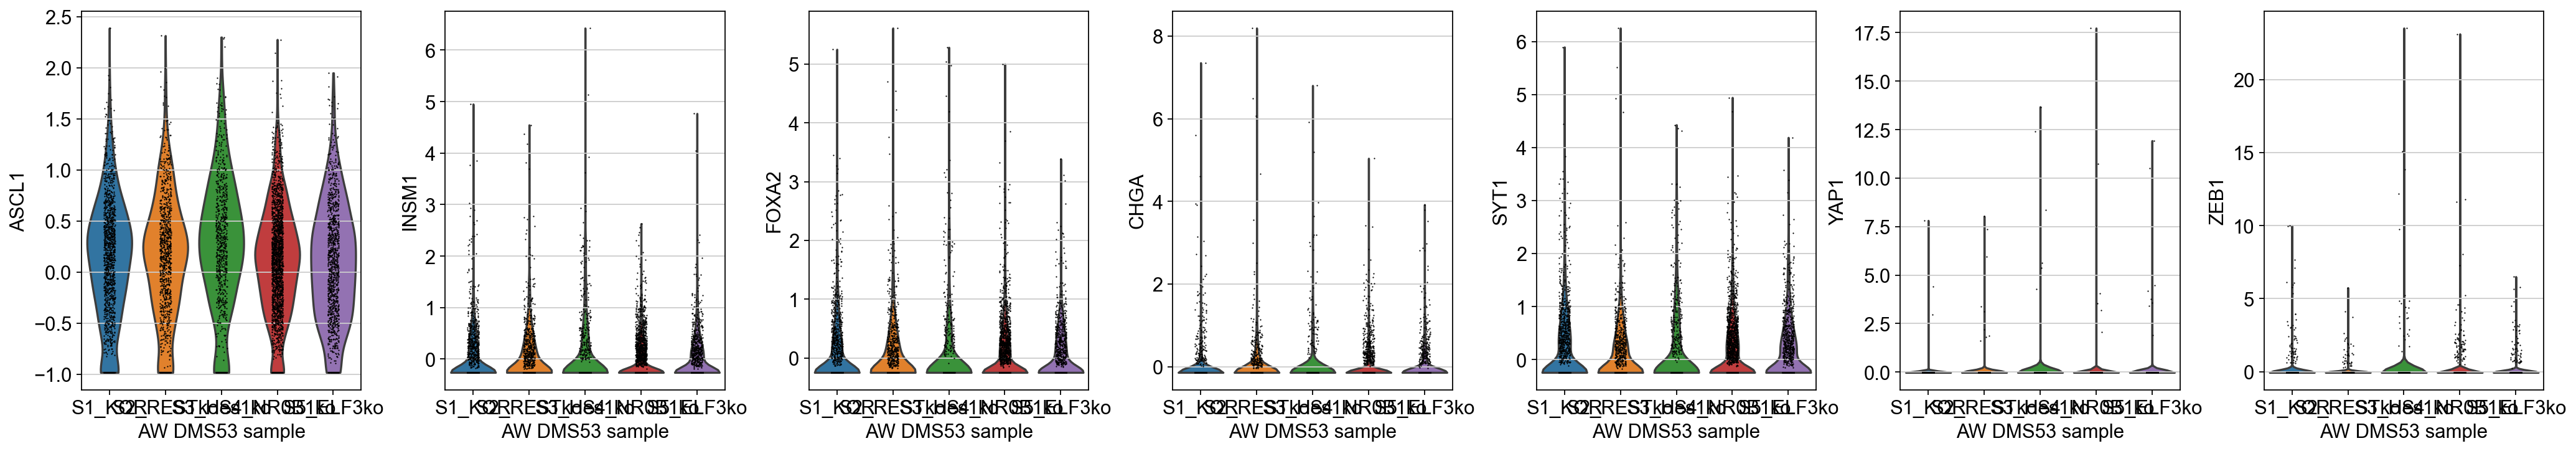

In [13]:
with rc_context({'figure.figsize': (4, 5)}):
    sc.pl.violin(dms53_dk, ['ASCL1','INSM1','FOXA2','CHGA','SYT1','YAP1','ZEB1'], groupby='AW_DMS53_sample' )

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_AW_DMS53_sample']`
categories: S1_KOR, S2_RESTko, S3_Hes1ko, etc.
var_group_labels: NE


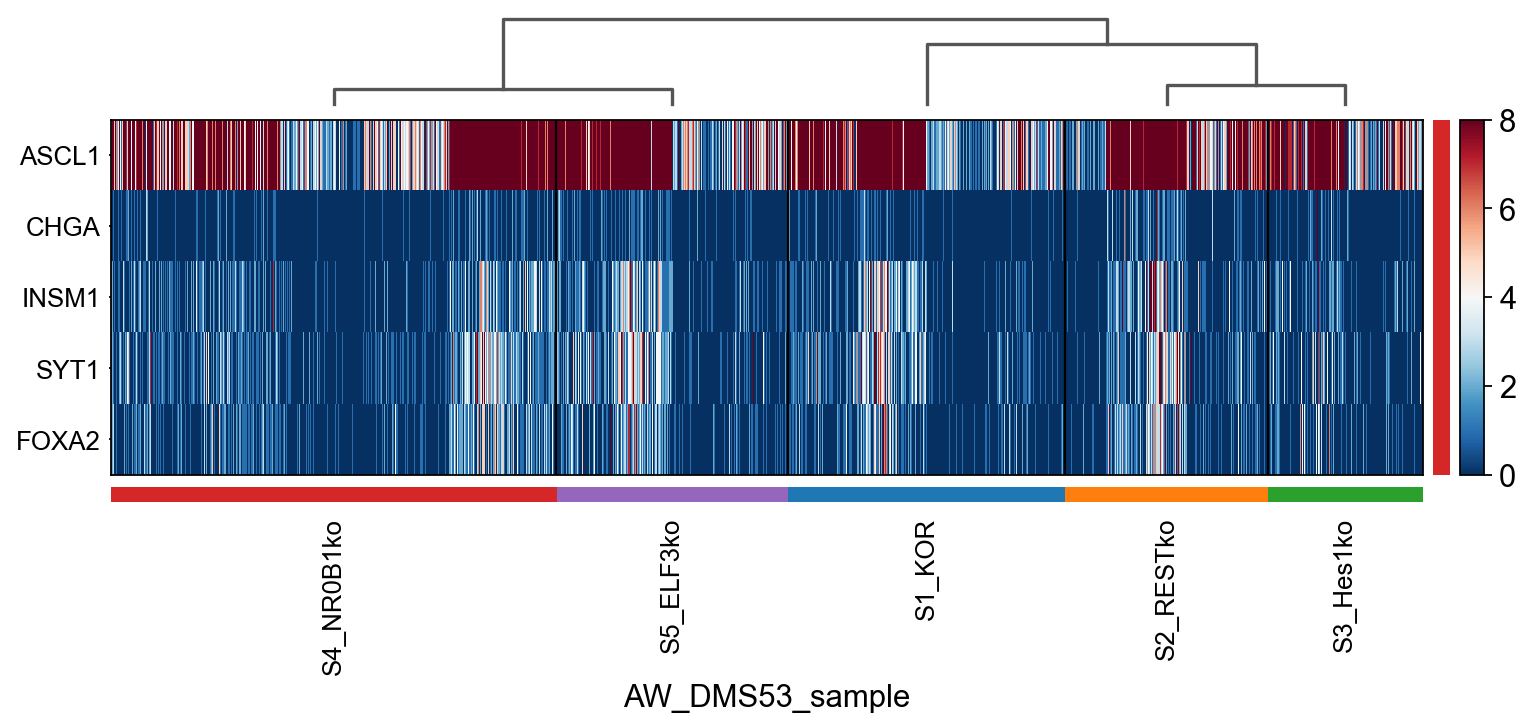

In [14]:
marker_genes_dict = {
    'NE': ['ASCL1','CHGA','INSM1','SYT1','FOXA2']
    # ,'nonNE': ['ZEB1','VIM']
}
ax = sc.pl.heatmap(dms53_dk, marker_genes_dict, groupby='AW_DMS53_sample', layer='raw_counts', vmin=0, vmax=8, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

In [15]:
dms53_dk.obs

dropkick_score dropkick_label  \
AAATGACCCGTTCTGTT-S1 DMS53_KOR             0.669535           True   
AAGCGCCTTCGCTCTCA-S1 DMS53_KOR             0.774037           True   
GACCACATTACGGCTTAC-S1 DMS53_KOR            0.647996           True   
TGATGTGGCTATCGACACC-S1 DMS53_KOR           0.501247           True   
ATCTGCATCACACTAAG-S1 DMS53_KOR             0.575408           True   
...                                             ...            ...   
CCAACCGTATACCCAG-S5 DMS53_ELF3ko           0.857161           True   
GATGTTCCAGGTCCATGT-S5 DMS53_ELF3ko         0.669088           True   
GGCCCTTAAGGCAGTT-S5 DMS53_ELF3ko           0.761281           True   
CTTTAATCATGAAGCA-S5 DMS53_ELF3ko           0.752812           True   
TGAAGCGCGATAGCGCCTT-S5 DMS53_ELF3ko        0.733420           True   

                                     arcsinh_n_genes_by_counts  \
AAATGACCCGTTCTGTT-S1 DMS53_KOR                        6.100324   
AAGCGCCTTCGCTCTCA-S1 DMS53_KOR                        6.104798   
GACCACATTACGGCTTAC-S1 DMS53_KOR                       6.109253   
TGATGTGGCTATCGACACC-S1 DMS53_KOR                      6.113687   
ATCTGCATCACACTAAG-S1 DMS53_KOR                        6.118102   
...                                                        ...   
CCAACCGTATACCCAG-S5 DMS53_ELF3ko                      9.559870   
GATGTTCCAGGTCCATGT-S5 DMS53_ELF3ko                    9.561420   
GGCCCTTAAGGCAGTT-S5 DMS53_ELF3ko                      9.640953   
CTTTAATCATGAAGCA-S5 DMS53_ELF3ko                      9.648208   
TGAAGCGCGATAGCGCCTT-S5 DMS53_ELF3ko                   9.742262   

                                    AW_DMS53_sample  initial_size  \
AAATGACCCGTTCTGTT-S1 DMS53_KOR               S1_KOR         650.0   
AAGCGCCTTCGCTCTCA-S1 DMS53_KOR               S1_KOR         655.0   
GACCACATTACGGCTTAC-S1 DMS53_KOR              S1_KOR         493.0   
TGATGTGGCTATCGACACC-S1 DMS53_KOR             S1_KOR         309.0   
ATCTGCATCACACTAAG-S1 DMS53_KOR               S1_KOR         433.0   
...                                             ...           ...   
CCAACCGTATACCCAG-S5 DMS53_ELF3ko          S5_ELF3ko       30308.0   
GATGTTCCAGGTCCATGT-S5 DMS53_ELF3ko        S5_ELF3ko       30890.0   
GGCCCTTAAGGCAGTT-S5 DMS53_ELF3ko          S5_ELF3ko       33761.0   
CTTTAATCATGAAGCA-S5 DMS53_ELF3ko          S5_ELF3ko       35837.0   
TGAAGCGCGATAGCGCCTT-S5 DMS53_ELF3ko       S5_ELF3ko       43367.0   

                                     n_genes_by_counts  \
AAATGACCCGTTCTGTT-S1 DMS53_KOR                     223   
AAGCGCCTTCGCTCTCA-S1 DMS53_KOR                     224   
GACCACATTACGGCTTAC-S1 DMS53_KOR                    225   
TGATGTGGCTATCGACACC-S1 DMS53_KOR                   226   
ATCTGCATCACACTAAG-S1 DMS53_KOR                     227   
...                                                ...   
CCAACCGTATACCCAG-S5 DMS53_ELF3ko                  7092   
GATGTTCCAGGTCCATGT-S5 DMS53_ELF3ko                7103   
GGCCCTTAAGGCAGTT-S5 DMS53_ELF3ko                  7691   
CTTTAATCATGAAGCA-S5 DMS53_ELF3ko                  7747   
TGAAGCGCGATAGCGCCTT-S5 DMS53_ELF3ko               8511   

                                     log1p_n_genes_by_counts  total_counts  \
AAATGACCCGTTCTGTT-S1 DMS53_KOR                      5.411646         650.0   
AAGCGCCTTCGCTCTCA-S1 DMS53_KOR                      5.416100         655.0   
GACCACATTACGGCTTAC-S1 DMS53_KOR                     5.420535         493.0   
TGATGTGGCTATCGACACC-S1 DMS53_KOR                    5.424950         309.0   
ATCTGCATCACACTAAG-S1 DMS53_KOR                      5.429346         433.0   
...                                                      ...           ...   
CCAACCGTATACCCAG-S5 DMS53_ELF3ko                    8.866864       30308.0   
GATGTTCCAGGTCCATGT-S5 DMS53_ELF3ko                  8.868413       30890.0   
GGCCCTTAAGGCAGTT-S5 DMS53_ELF3ko                    8.947936       33761.0   
CTTTAATCATGAAGCA-S5 DMS53_ELF3ko                    8.955190       35837.0   
TGAAGCGCGATAGCGCCTT

In [16]:
f = dms53_dk[dms53_dk.obs['total_counts'] > 1000]
f = f[f.obs['AW_DMS53_sample'] != 'S2 DMS53_RESTko']


In [17]:
f

View of AnnData object with n_obs × n_vars = 5637 × 21758
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'mito', 'pct_dropout_by_counts-S1 DMS53_KOR', 'ambient-S1 DMS53_KOR', 'dropkick_coef-S1 DMS53_KOR', 'pct_dropout_by_counts-S2 DMS53_RESTko', 'ambient-S2 DMS53_RESTko', 'dropkick_coef-S2 DMS53_RESTko', 'pct_dropout_by_counts-S3 DMS53_Hes1ko', 'ambient-S3 DMS53_Hes1ko', 'dropkick_coef-S3 DMS53_Hes1ko', 'pct_dropout_by_counts-S4 DMS53_NR0B1ko', 'ambient-S4 DMS53_NR0B1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'pct_dropout_by_counts-S5 DMS53_ELF3ko', 'ambient-S5 DMS53_ELF3ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'pct_dropout_by_counts', 'ambien

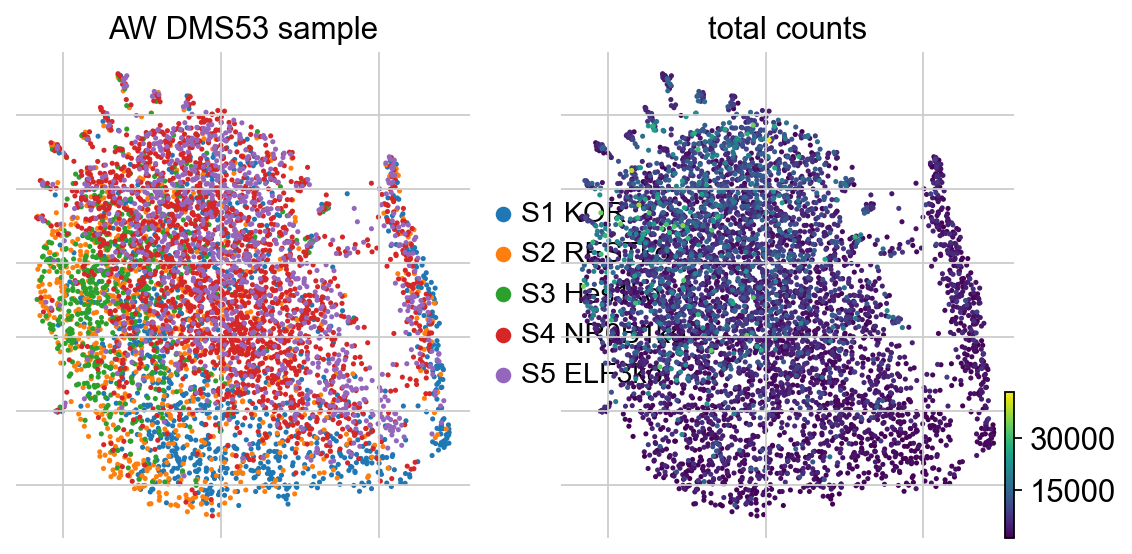

In [18]:
scv.pl.umap(f, color = ['AW_DMS53_sample','total_counts'], legend_loc = 'on right')

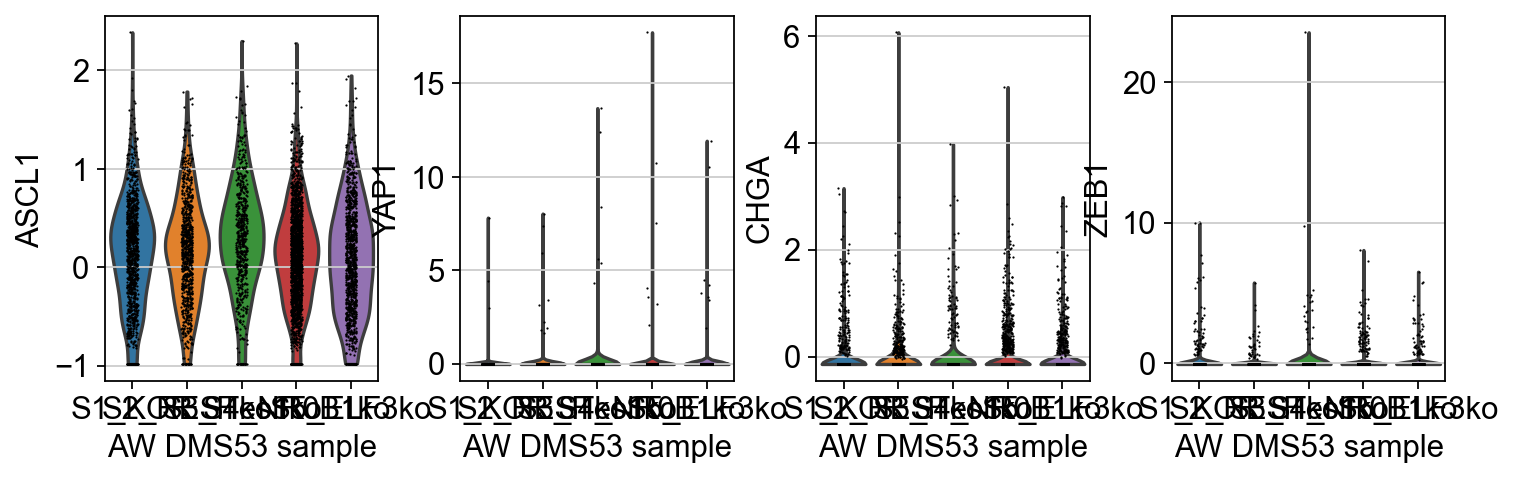

In [19]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.violin(f, ['ASCL1', 'YAP1','CHGA','ZEB1'], groupby='AW_DMS53_sample' )

In [20]:
f.obs['AW_DMS53_sample'].unique()

['S1_KOR', 'S2_RESTko', 'S3_Hes1ko', 'S4_NR0B1ko', 'S5_ELF3ko']
Categories (5, object): ['S1_KOR', 'S2_RESTko', 'S3_Hes1ko', 'S4_NR0B1ko', 'S5_ELF3ko']

In [21]:
temp = f.obs['AW_DMS53_sample'].replace('S[1-5]\ DMS53_','')

In [22]:
type(temp)

pandas.core.series.Series

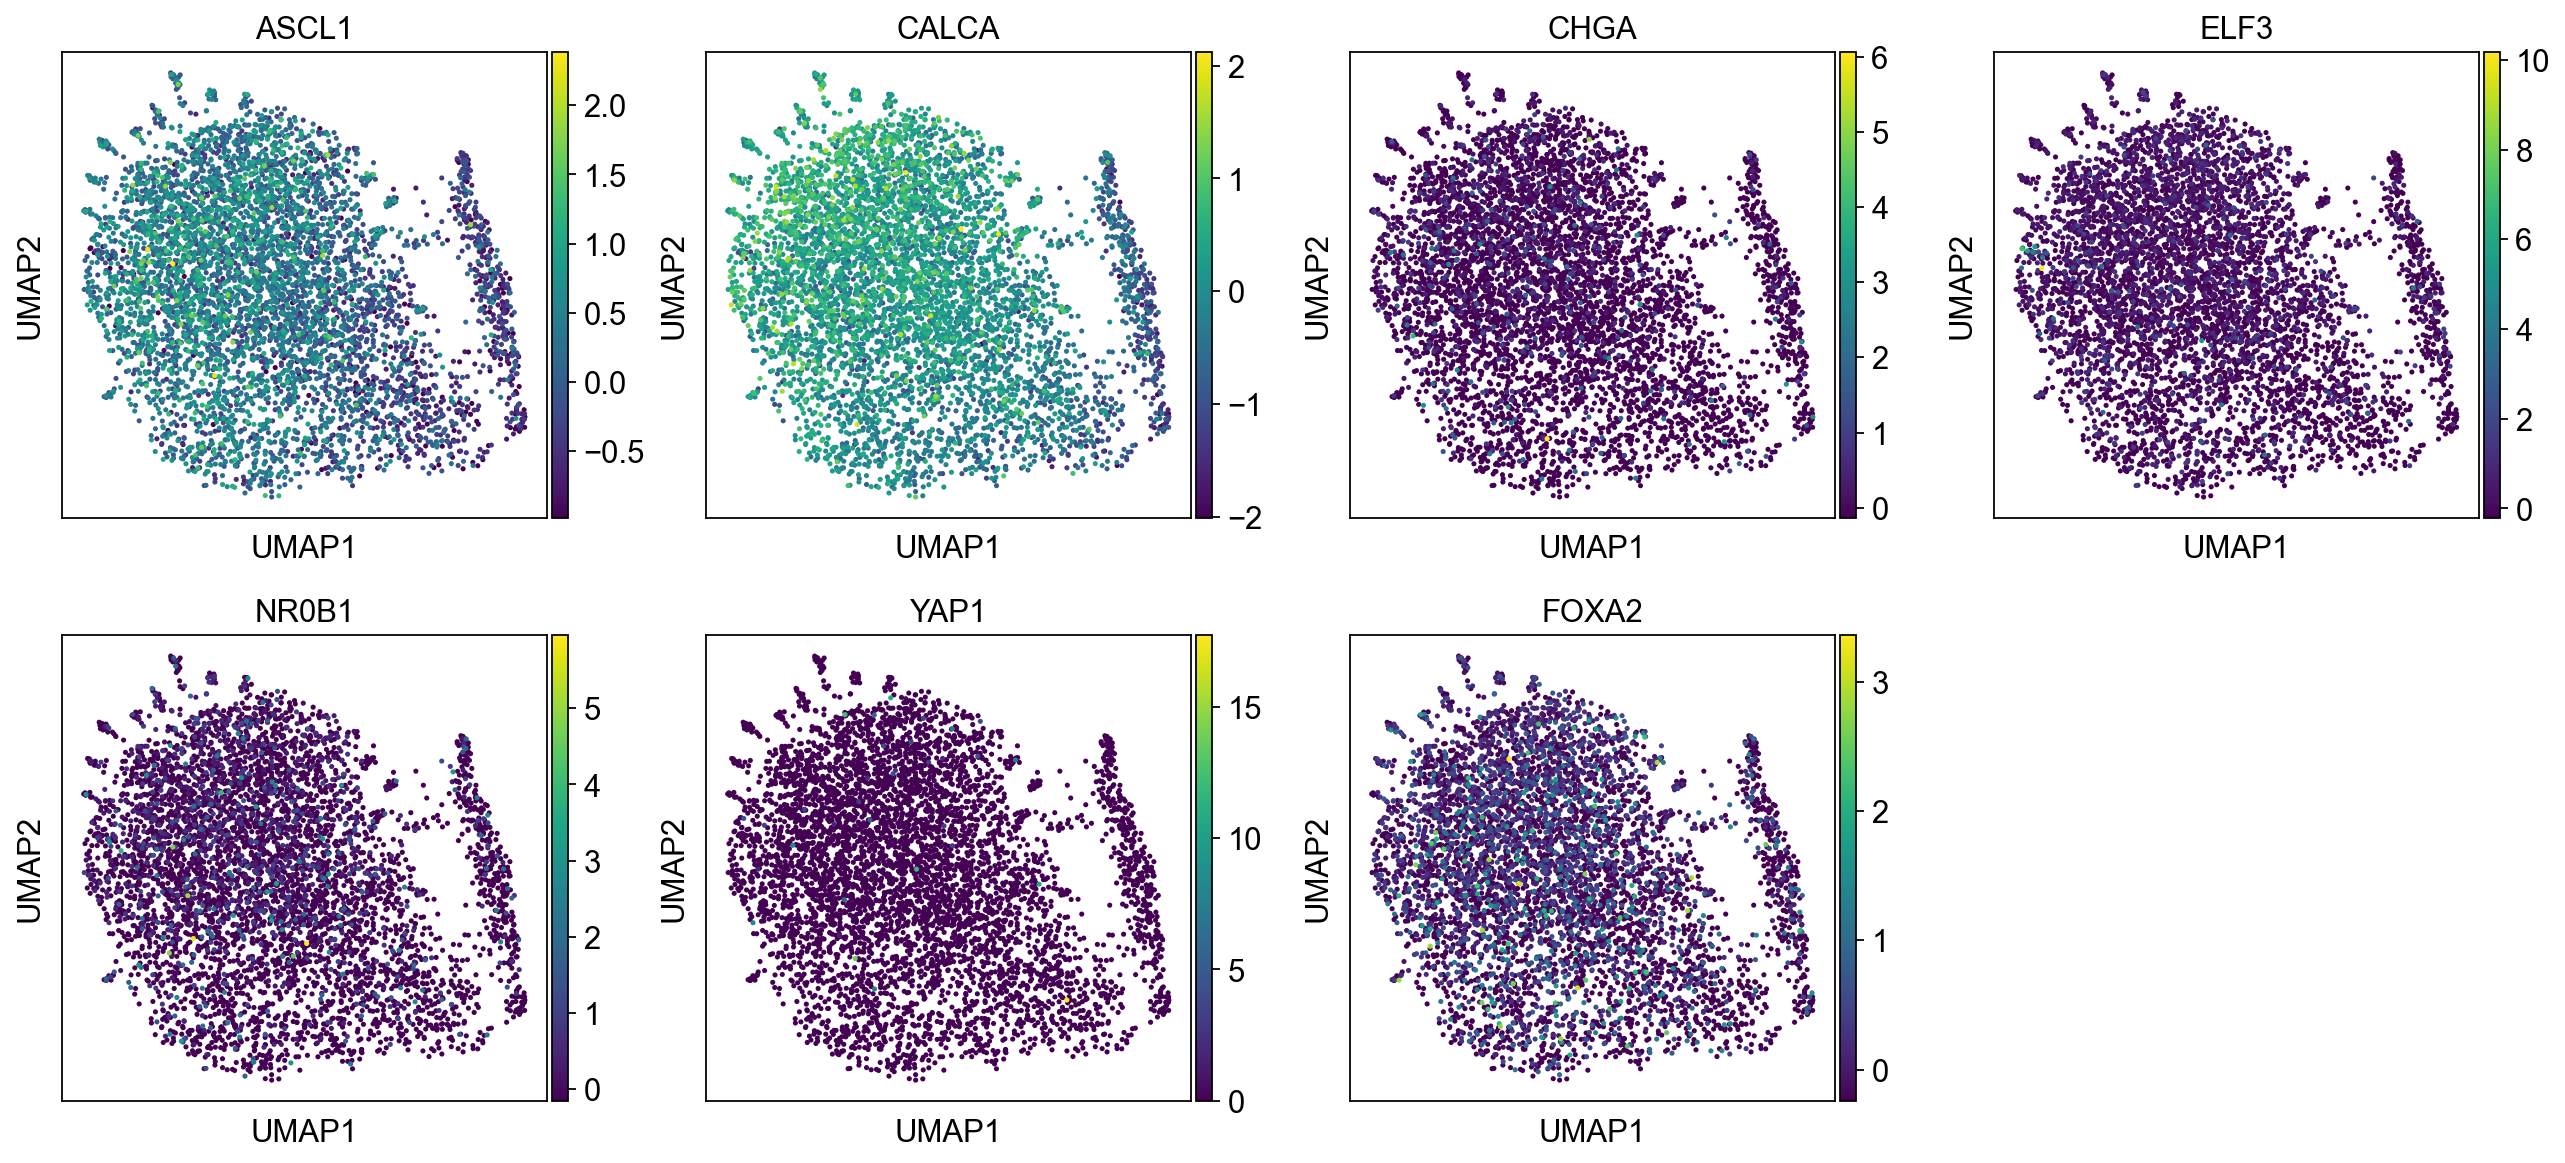

In [23]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(f, color=['ASCL1','CALCA','CHGA','ELF3','NR0B1','YAP1','FOXA2'])

In [24]:
f.layers

LayersView with keys: arcsinh_norm, log1p_norm, raw_counts

In [25]:
counts = f.X

In [26]:
# ascl1 = f[f.layers=='raw_counts']
ascl1 = f[:,f.var_names=='ASCL1']
ascl1

View of AnnData object with n_obs × n_vars = 5637 × 1
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'AW_DMS53_sample', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'mito', 'pct_dropout_by_counts-S1 DMS53_KOR', 'ambient-S1 DMS53_KOR', 'dropkick_coef-S1 DMS53_KOR', 'pct_dropout_by_counts-S2 DMS53_RESTko', 'ambient-S2 DMS53_RESTko', 'dropkick_coef-S2 DMS53_RESTko', 'pct_dropout_by_counts-S3 DMS53_Hes1ko', 'ambient-S3 DMS53_Hes1ko', 'dropkick_coef-S3 DMS53_Hes1ko', 'pct_dropout_by_counts-S4 DMS53_NR0B1ko', 'ambient-S4 DMS53_NR0B1ko', 'dropkick_coef-S4 DMS53_NR0B1ko', 'pct_dropout_by_counts-S5 DMS53_ELF3ko', 'ambient-S5 DMS53_ELF3ko', 'dropkick_coef-S5 DMS53_ELF3ko', 'pct_dropout_by_counts', 'ambient', 

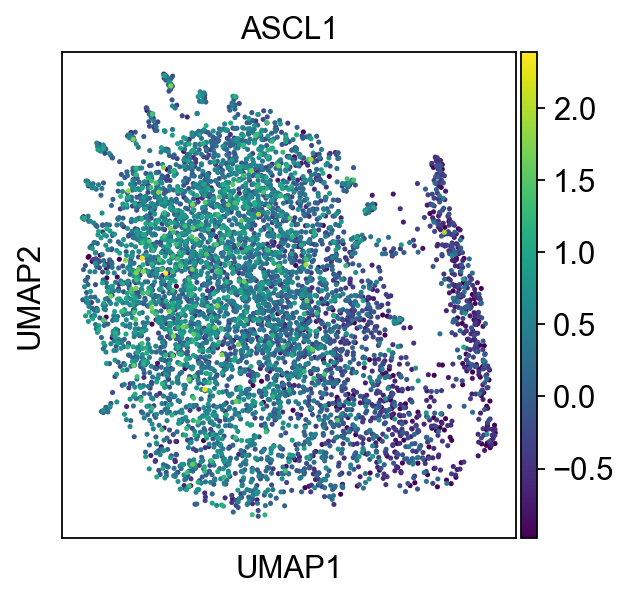

In [27]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(ascl1, color=['ASCL1'])

categories: S1_KOR, S2_RESTko, S3_Hes1ko, etc.
var_group_labels: NE


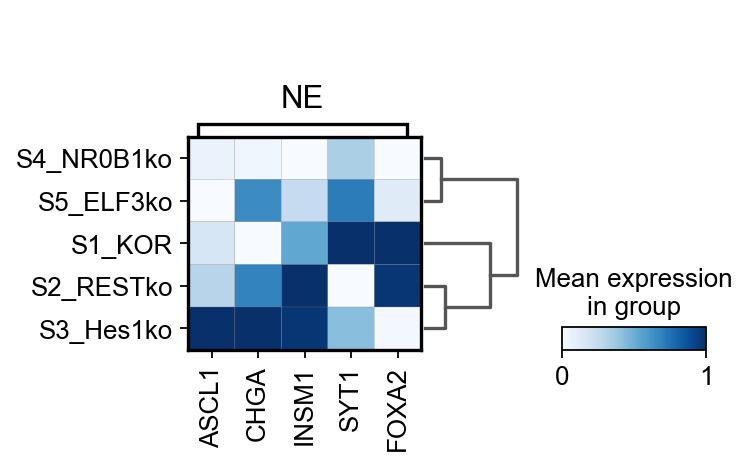

In [28]:
sc.pl.matrixplot(dms53_dk, marker_genes_dict, 'AW_DMS53_sample', dendrogram=True, cmap='Blues', standard_scale='var')

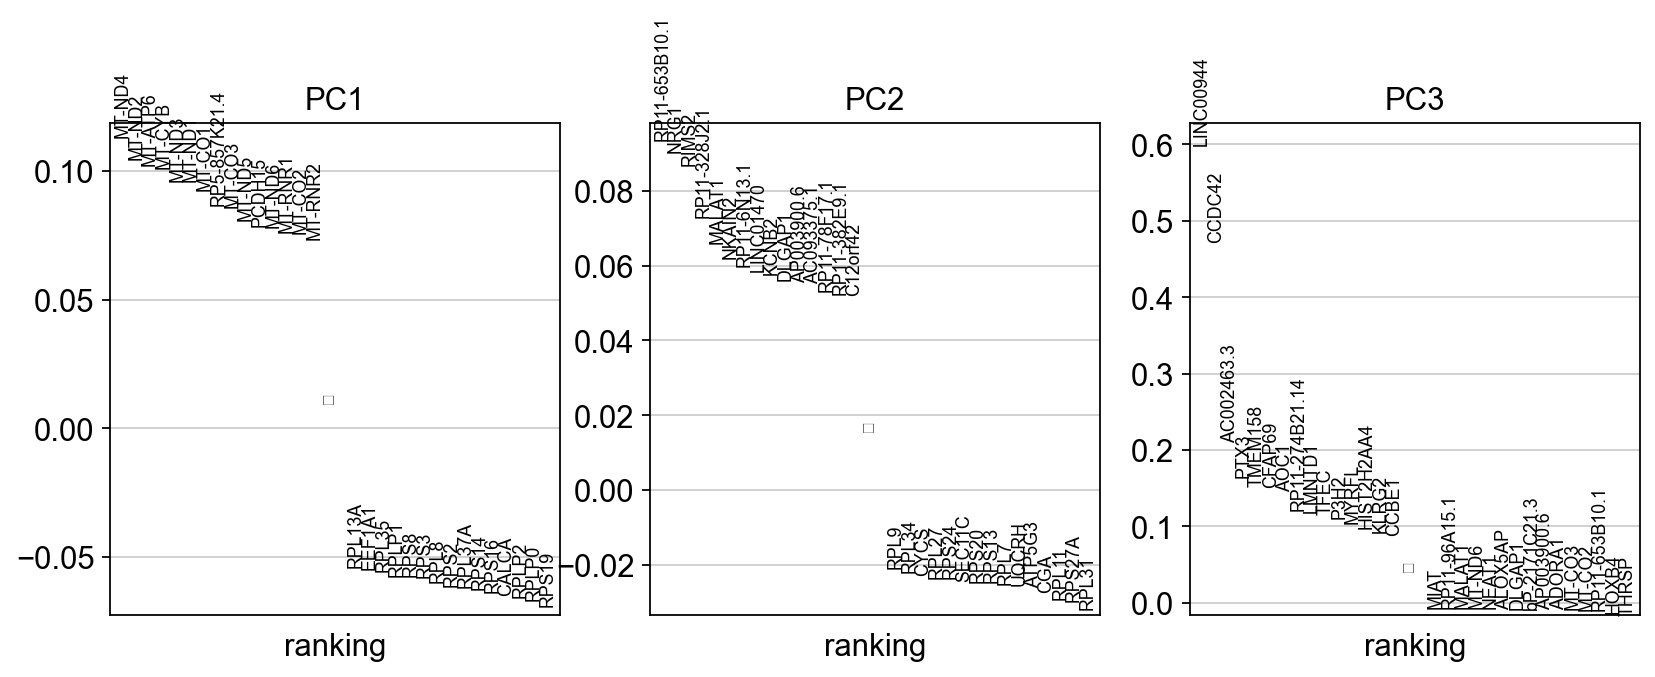

In [29]:
sc.pl.pca_loadings(dms53_dk)